# Project 1

# 1. Introduction
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

## Import Libraries

In [67]:
import warnings
warnings.simplefilter("ignore")

In [51]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import auc,roc_curve

## Data Pre-processing

In [17]:
df=pd.read_csv(r"C:\Users\hp\Desktop\python\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


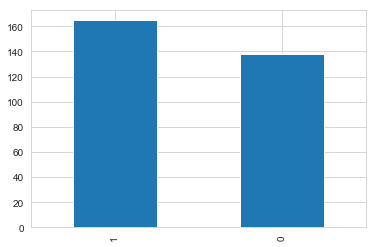

In [341]:
df['target'].value_counts().plot(kind='bar')

In [22]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [27]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [24]:
df.shape

(303, 14)

## Data Visualisation

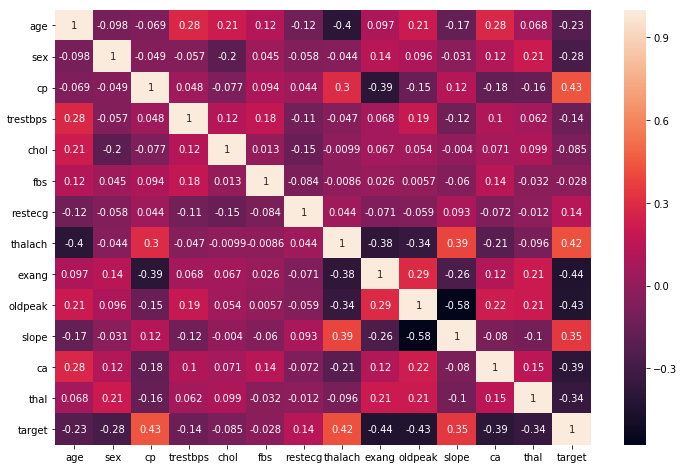

In [29]:
corr=df.corr()
fig=plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)


Text(0.5, 1.0, '[0]==Not Disease,[1]==disease')

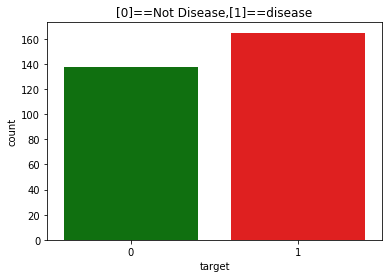

In [34]:
sns.countplot(df['target'],palette=['green','red'])
plt.title("[0]==Not Disease,[1]==disease")

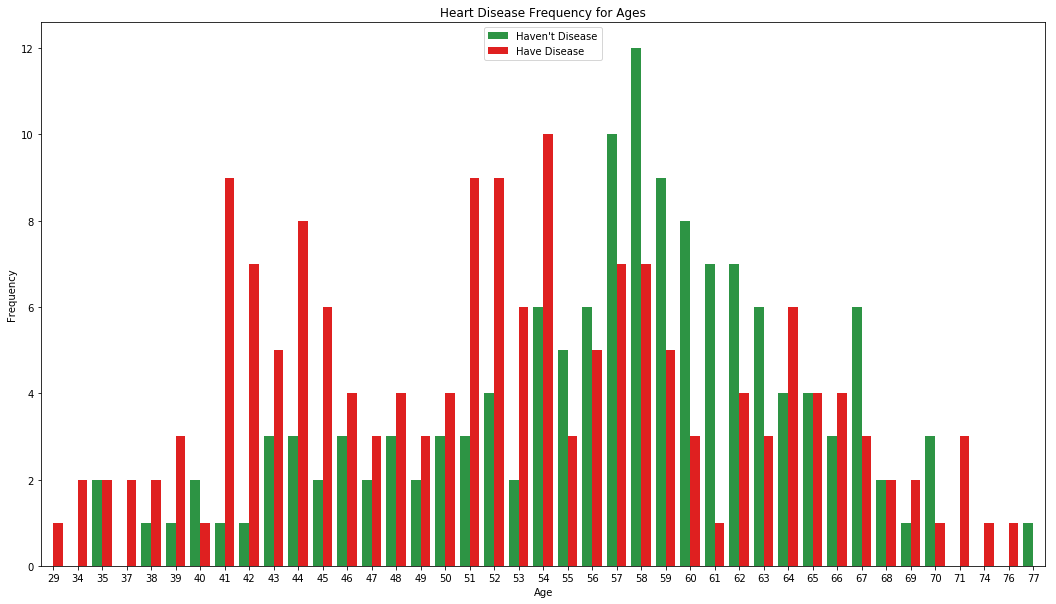

In [39]:
plt.figure(figsize=(18, 10))
sns.countplot(x='age', hue='target', data=df, palette=['#1CA53B', 'red'])
plt.legend(["Haven't Disease", "Have Disease"])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

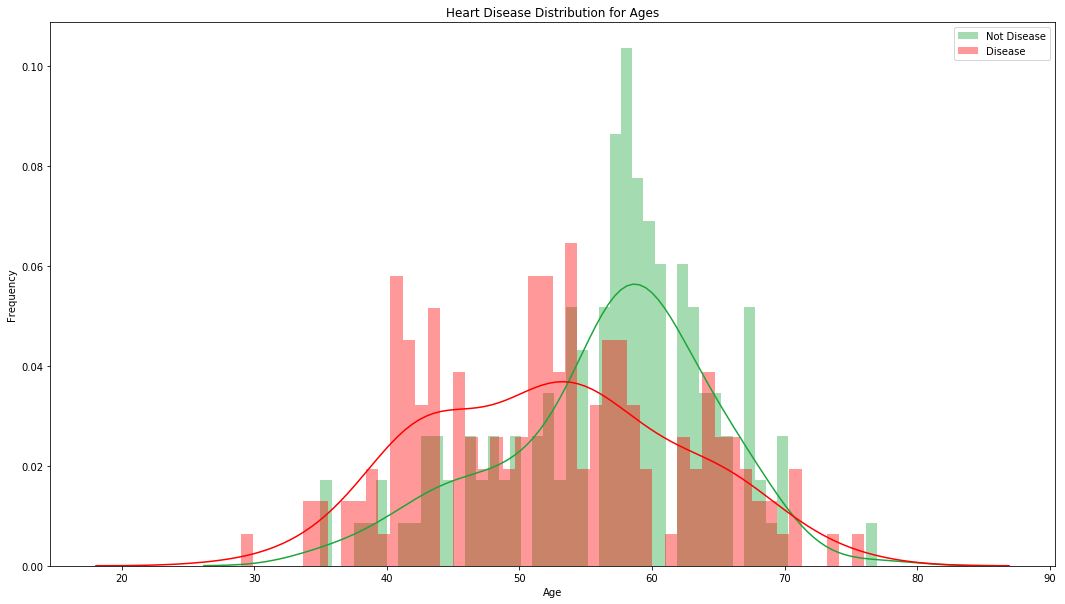

In [49]:
plt.figure(figsize=(18, 10))
sns.distplot(df.age[df['target'] == 0], bins=50, color='#1CA53B', label='Not Disease')
sns.distplot(df.age[df['target'] == 1], bins=50, color='red', label='Disease')
plt.legend()
plt.title('Heart Disease Distribution for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [52]:
X=df.drop('target',axis=1).values
y=df['target'].values
X=StandardScaler().fit_transform(X)

### Model

In [300]:
class Model:
    def __init__(self,model,X,y):
        self.model=model
        self.X=X
        self.y=y
        self.X_train,self.X_test,self.y_train,self.y_test=train_test_split(self.X,self.y,test_size=0.3,random_state=42)
        self.model.fit(self.X_train,self.y_train)
        print(f"{self.model_str()} Model Trained..")
        self.y_pred=self.model.predict(self.X_test)
        
    def model_str(self):
        return str(self.model.__class__.__name__)
    def CrossvalScore(self,cv=5):
        print(self.model_str()+"\n"+'='*60)
        scores = ["accuracy", "precision", "recall", "roc_auc"]
        for score in scores:
            cv_acc=cross_val_score(self.model,self.X_train,self.y_train,cv=cv,scoring=score).mean()
            print("Model " + score + " : " + "%.3f" % cv_acc)
    def accuracy(self):
        acc=accuracy_score(self.y_test,self.y_pred)
        print(self.model_str()+'model accuracy is')
        return acc
        
    def confusion(self):
        plt.figure(figsize=(7,7))
        mat=confusion_matrix(self.y_test,self.y_pred)
        sns.heatmap(mat.T,annot=True,xticklabels=["Haven't Disease","Have Disease"],yticklabels=["Haven't Disease","Have Disease"])
    
        
    def classificationreport(self):
        print(self.model_str() +'\n'+'*'*60)
        cr=classification_report(self.y_test,self.y_pred)
        print(cr)
    
    

In [301]:
from sklearn.ensemble import RandomForestClassifier
clf=Model(model=RandomForestClassifier(),X=X,y=y)
clf.CrossvalScore(cv=10)


RandomForestClassifier Model Trained..
RandomForestClassifier
Model accuracy : 0.783
Model precision : 0.811
Model recall : 0.810
Model roc_auc : 0.883


In [302]:
clf.accuracy()

RandomForestClassifiermodel accuracy is


0.7802197802197802

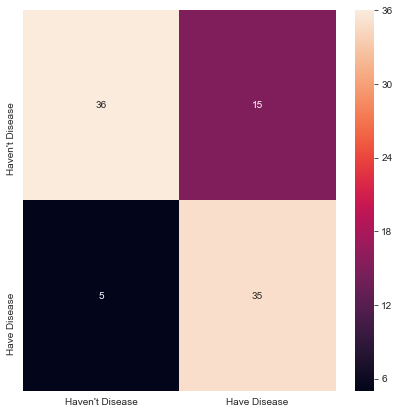

In [303]:
clf.confusion()

In [304]:
clf.classificationreport()

RandomForestClassifier
************************************************************
              precision    recall  f1-score   support

           0       0.71      0.88      0.78        41
           1       0.88      0.70      0.78        50

   micro avg       0.78      0.78      0.78        91
   macro avg       0.79      0.79      0.78        91
weighted avg       0.80      0.78      0.78        91



In [305]:
from sklearn.svm import SVC
svm= Model(SVC(C=0.1,probability=True),X=X,y=y)

SVC Model Trained..


In [306]:
svm.CrossvalScore()

SVC
Model accuracy : 0.788
Model precision : 0.747
Model recall : 0.930
Model roc_auc : 0.901


In [307]:
svm.accuracy()


SVCmodel accuracy is


0.8571428571428571

In [308]:
svm.classificationreport()

SVC
************************************************************
              precision    recall  f1-score   support

           0       0.87      0.80      0.84        41
           1       0.85      0.90      0.87        50

   micro avg       0.86      0.86      0.86        91
   macro avg       0.86      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91



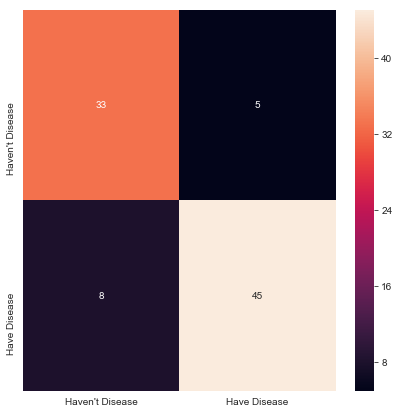

In [309]:
svm.confusion()

In [310]:
from sklearn.neighbors import KNeighborsClassifier
knn=Model(KNeighborsClassifier(n_neighbors=5),X=X,y=y)

KNeighborsClassifier Model Trained..


In [311]:
knn.CrossvalScore()

KNeighborsClassifier
Model accuracy : 0.806
Model precision : 0.812
Model recall : 0.843
Model roc_auc : 0.878


In [312]:
knn.accuracy()

KNeighborsClassifiermodel accuracy is


0.8791208791208791

In [313]:
knn.classificationreport()

KNeighborsClassifier
************************************************************
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        41
           1       0.88      0.90      0.89        50

   micro avg       0.88      0.88      0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



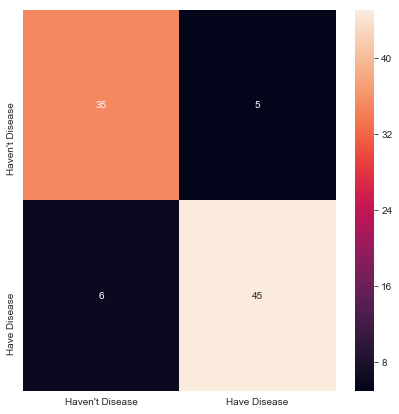

In [314]:
knn.confusion()

In [315]:
from sklearn.tree import DecisionTreeClassifier
dt=Model(DecisionTreeClassifier(criterion='entropy',max_depth=4),X=X,y=y)

DecisionTreeClassifier Model Trained..


In [316]:
dt.CrossvalScore()

DecisionTreeClassifier
Model accuracy : 0.759
Model precision : 0.761
Model recall : 0.809
Model roc_auc : 0.777


In [317]:
dt.accuracy()


DecisionTreeClassifiermodel accuracy is


0.7252747252747253

In [318]:
dt.classificationreport()

DecisionTreeClassifier
************************************************************
              precision    recall  f1-score   support

           0       0.65      0.83      0.73        41
           1       0.82      0.64      0.72        50

   micro avg       0.73      0.73      0.73        91
   macro avg       0.74      0.73      0.73        91
weighted avg       0.75      0.73      0.72        91



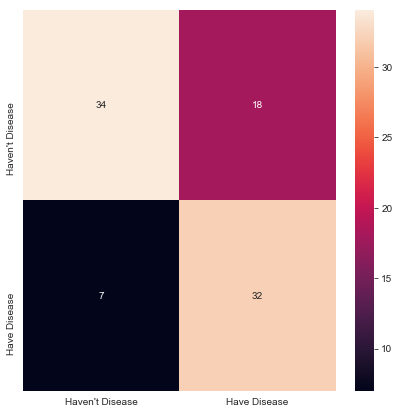

In [319]:
dt.confusion()

In [320]:
models = [clf, svm, dt, knn]
names = []
accs = []
for model in models:
    accs.append(model.accuracy());
    names.append(model.model_str());

RandomForestClassifiermodel accuracy is
SVCmodel accuracy is
DecisionTreeClassifiermodel accuracy is
KNeighborsClassifiermodel accuracy is


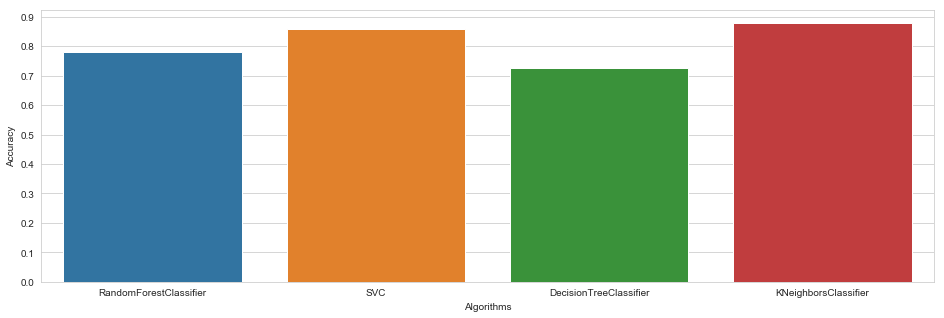

In [321]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,1.2,0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=names, y=accs)
plt.savefig('models_accuracy.png')
plt.show()

## From above we can see ,Knearest neighbors gives us more accuracy than other classification algorithm